Task -1

In [2]:
!pip -q install pytesseract transformers
!pip -q install pdfplumber PyMuPDF pymupdf
!pip -q install langchain-community

In [3]:
from PIL import Image
import pytesseract
from transformers import CLIPProcessor, CLIPModel
import torch

# Load logo
image = Image.open("sample_image.png")

# OCR to extract text
ocr_text = pytesseract.image_to_string(image)

# Use CLIP for visual embedding
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    image_features = model.get_image_features(**inputs)

image_features = image_features / image_features.norm(dim=-1, keepdim=True)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [4]:
image_features

tensor([[ 2.5519e-02, -1.1114e-02, -1.3579e-02, -4.5351e-03,  2.8519e-03,
         -1.5786e-02,  1.2823e-02,  3.6550e-02, -4.7057e-02,  3.0452e-02,
         -1.0689e-02, -8.5247e-03, -6.5664e-03, -5.9172e-02, -1.7665e-02,
         -1.7372e-03, -5.3519e-02,  1.9526e-02, -1.3455e-02,  2.7507e-02,
          2.3673e-02,  1.0063e-02, -3.1868e-02, -3.3355e-02,  4.0332e-02,
         -2.5852e-03,  1.7108e-02,  2.5900e-02, -4.0285e-03, -1.0737e-02,
         -3.9632e-02,  1.3385e-02, -1.3765e-02,  2.5334e-02,  1.0374e-02,
          1.0276e-02,  1.2495e-03, -3.2030e-03, -2.5184e-02,  5.0658e-03,
          2.3535e-02,  2.1341e-02,  1.7921e-02, -2.4038e-02,  2.4659e-02,
         -4.8051e-02, -2.9449e-02,  4.8353e-02,  1.3849e-02, -2.0298e-02,
          1.8593e-02,  4.2167e-02, -3.0245e-03, -3.0518e-02, -1.6168e-03,
         -1.7304e-02,  1.3302e-02,  2.2900e-02, -1.1510e-02,  1.6507e-02,
         -6.1334e-02,  9.3461e-03, -9.3433e-03, -5.0401e-03, -8.7980e-03,
          2.4645e-02, -9.9170e-03, -2.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 77.3 MB/s eta 0:00:00


In [12]:
import pdfplumber
import fitz  # PyMuPDF

pdf_text = ""
with pdfplumber.open("document.pdf") as pdf:
    for page in pdf.pages:
        pdf_text += page.extract_text()

# Extract images and colors (advanced)
doc = fitz.open("document.pdf")
colors = []
for page in doc:
    for img in page.get_images(full=True):
        pix = fitz.Pixmap(doc, img[0])
        if pix.n >= 4:  # RGBA
            pix = fitz.Pixmap(fitz.csRGB, pix)
        colors.append(pix.get_pixmap().samples)
        pix = None


In [13]:
from transformers import pipeline

# Use zero-shot classifier or summarizer
persona_text = """
John is a 34-year-old eco-conscious startup founder. He values minimalism, clarity, and nature-inspired themes.
"""

summary = pipeline("summarization")(persona_text, max_length=60, min_length=20, do_sample=False)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 60, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "key"

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate

template = """
Based on the following data:
Image OCR Text: {ocr_text}
Image Embedding: {image_description}
PDF Text: {pdf_text}
Persona Summary: {persona}

Create a structured identity vector with keys:
- Brand Tone
- Visual Themes
- Colors / Fonts
- Personality Traits
- Style Keywords
"""

prompt = ChatPromptTemplate.from_template(template)
chat = ChatOpenAI(temperature=0.2)

identity_vector = chat.invoke(prompt.format_messages(
    ocr_text=ocr_text,
    image_description="(describe from CLIP if needed)",
    pdf_text=pdf_text[:1000],  # Truncate if large
    persona=summary[0]['summary_text']
))


Task -2

In [23]:
!pip -q install transformers Pillow matplotlib colorthief openai

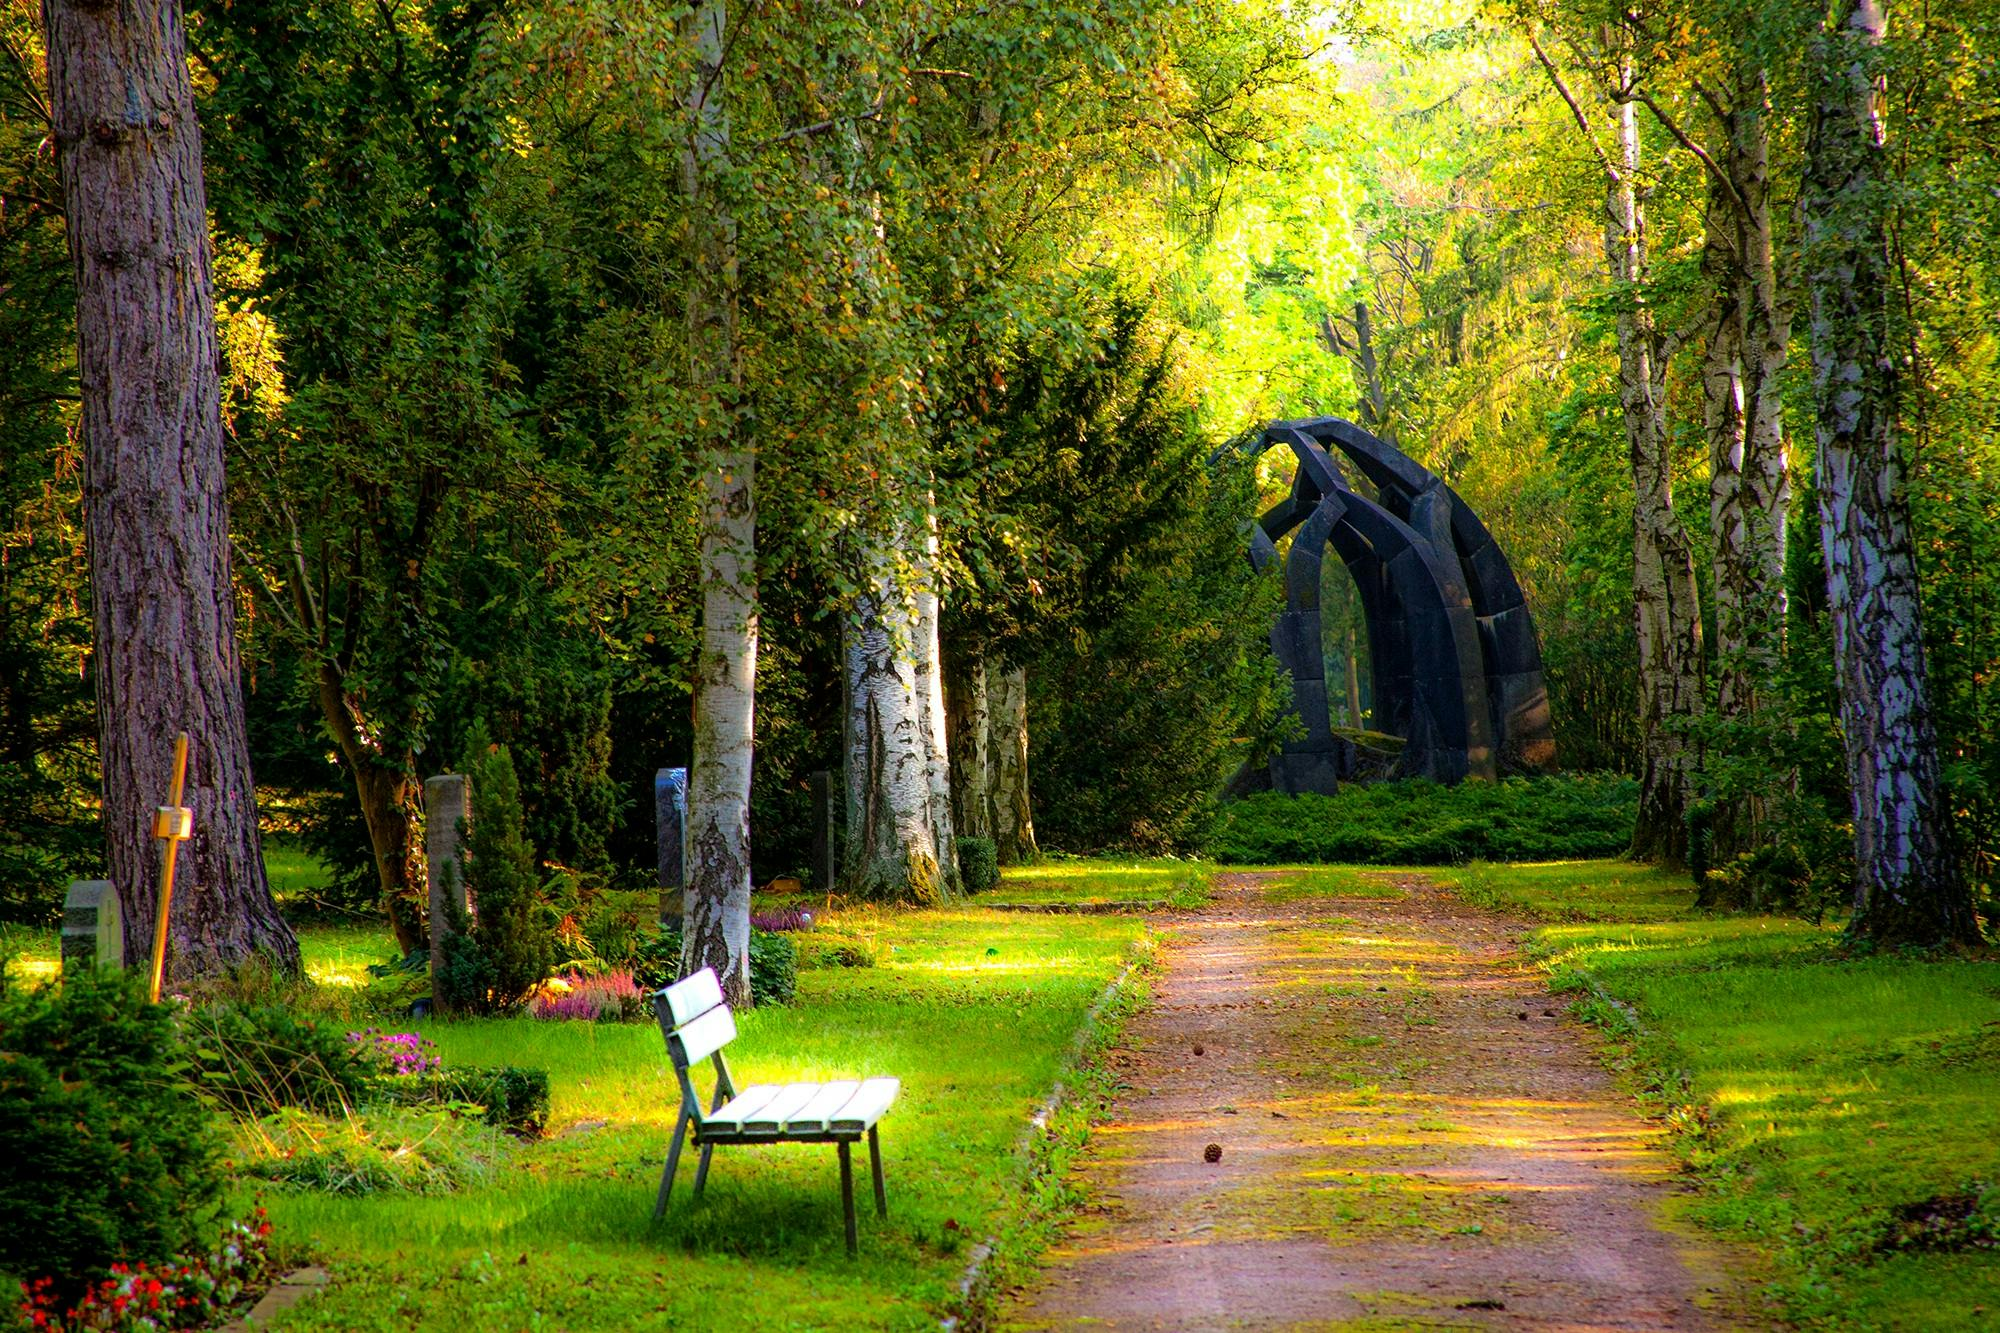

In [24]:
from PIL import Image
from IPython.display import display

# Upload image
uploaded_path = "/content/sample_image.png"  # Upload via Colab sidebar
theme_prompt = "Futuristic neon vibe for interactive UI"

img = Image.open(uploaded_path)
display(img)


In [25]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").eval()

inputs = processor(images=img, return_tensors="pt")
with torch.no_grad():
    out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

print("Image Caption:", caption)


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Image Caption: a bench sits in the middle of a forest


In [26]:
from colorthief import ColorThief

color_thief = ColorThief(uploaded_path)
palette = color_thief.get_palette(color_count=5)
hex_colors = ['#%02x%02x%02x' % color for color in palette]

print("Dominant Colors:", hex_colors)

Dominant Colors: ['#323d13', '#d1c151', '#887d32', '#90b71d', '#878295']


In [ ]:
import openai
from openai import OpenAI
import os

api_key = "key"

prompt = f"""
You are a UI theme config generator. Given:
- A user theme description: "{theme_prompt}"
- An image caption: "{caption}"
- A color palette: {hex_colors}

Generate a JSON configuration with the following keys:
- primary_colors
- mood
- font_style
- background
- ui_elements_style (buttons, cards, navbar)
"""
client = OpenAI(api_key=api_key)
response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": prompt}],
)

print(response.choices[0].message.content)

import json
config_json = response.choices[0].message.content
print(config_json)


NotFoundError: Error code: 404 - {'error': {'message': 'The model `gpt-4` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}